In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from mlxtend.plotting import plot_decision_regions
import tensorflow as tf
from tensorflow import keras

In [6]:
#!pip install tensorflow

In [7]:
df = pd.read_pickle('Dataset.pkl')

In [8]:
df.drop(['VARIACAO_COTACAO_MINERIO_FERRO_MES'],axis=1, inplace=True)

In [9]:
from numpy import int64

df['TEMPO_DURACAO'] = df['TEMPO_DURACAO'].astype(int64)
df['TEMPO_RECURSO'] = df['TEMPO_RECURSO'].astype(int64)

Text(0.5, 1.0, 'Valores Faltantes')

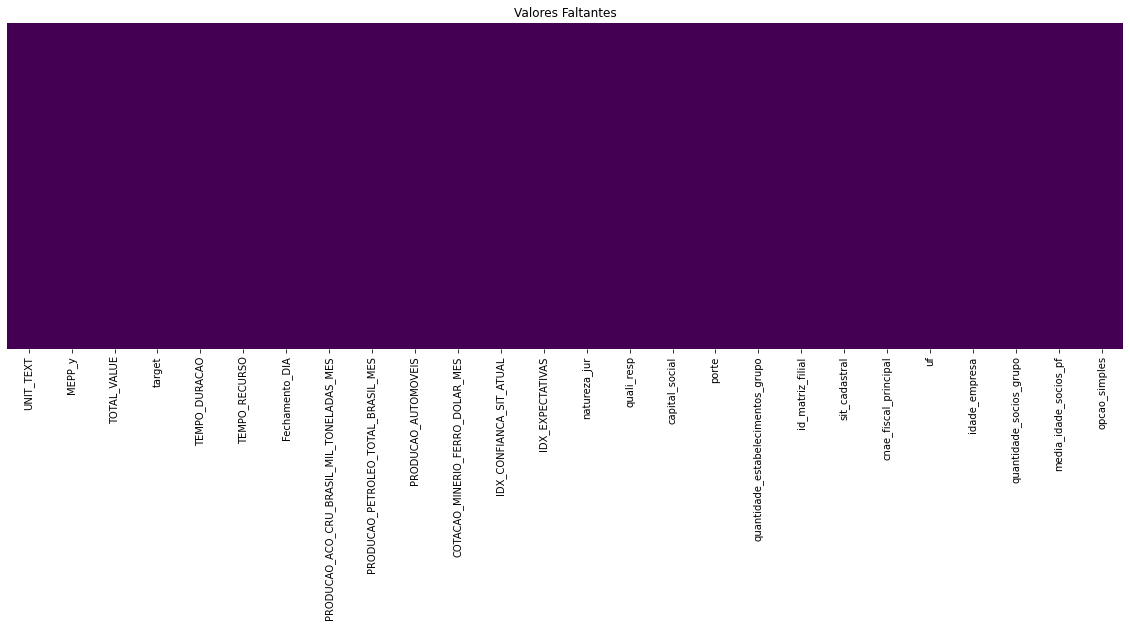

In [10]:
plt.figure(figsize=(20,6))
sns.heatmap(df.isna(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Valores Faltantes')

In [11]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
scaler = RobustScaler()

scaled_values = scaler.fit_transform(df[['TOTAL_VALUE']])
# Assign the scaled values back to the original dataframe
df['TOTAL_VALUE_scaled'] = pd.Series(scaled_values.reshape(-1), index=df.index)

df.drop(['TOTAL_VALUE'], axis=1, inplace=True)

<AxesSubplot:>

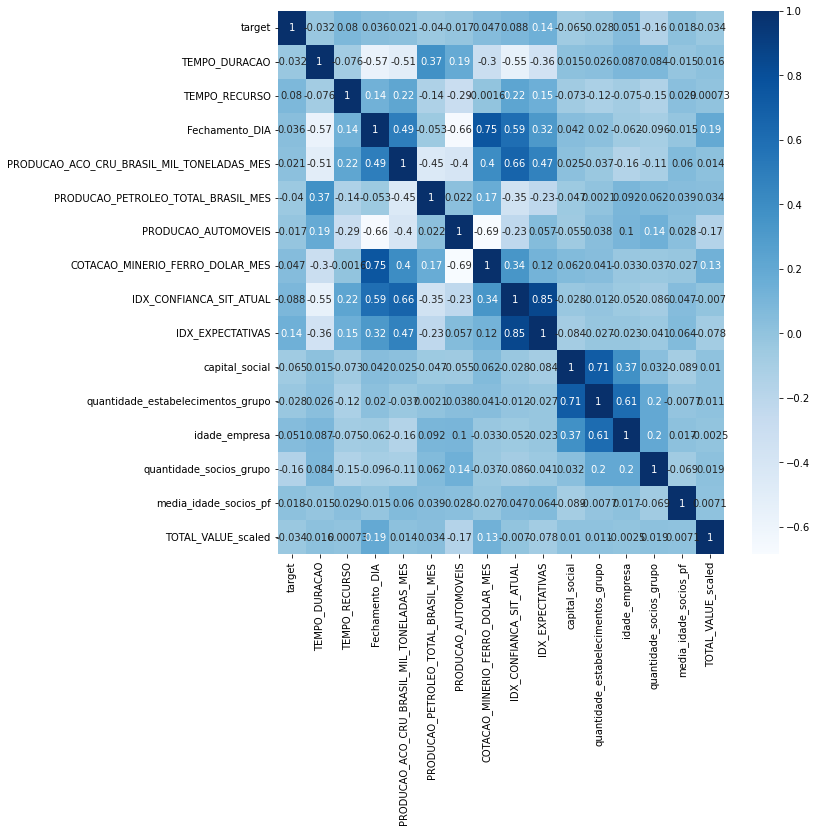

In [12]:
import matplotlib.pyplot as plt

# correlation plot
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, cmap = 'Blues', annot= True)

<AxesSubplot:>

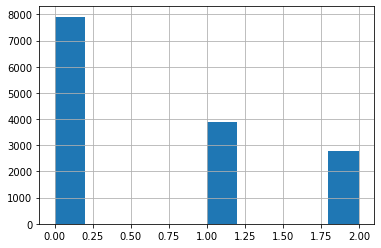

In [13]:
df.target.hist()

In [14]:
one_hot_encoding_columns = df.describe(include='O').T.reset_index()['index'].to_list()
one_hot_encoding_columns


['UNIT_TEXT',
 'MEPP_y',
 'natureza_jur',
 'quali_resp',
 'porte',
 'id_matriz_filial',
 'sit_cadastral',
 'cnae_fiscal_principal',
 'uf',
 'opcao_simples']

In [15]:
prefix = dict(zip(one_hot_encoding_columns, one_hot_encoding_columns))
prefix

{'UNIT_TEXT': 'UNIT_TEXT',
 'MEPP_y': 'MEPP_y',
 'natureza_jur': 'natureza_jur',
 'quali_resp': 'quali_resp',
 'porte': 'porte',
 'id_matriz_filial': 'id_matriz_filial',
 'sit_cadastral': 'sit_cadastral',
 'cnae_fiscal_principal': 'cnae_fiscal_principal',
 'uf': 'uf',
 'opcao_simples': 'opcao_simples'}

In [16]:
# Dummy variable
df = pd.get_dummies(data = df, prefix = prefix, prefix_sep='_',
               columns = one_hot_encoding_columns,
               drop_first =True,
              dtype='int8')

In [17]:
ratio = 0.10

In [18]:
#Creating X and y:
X = df.drop('target', axis=1)
y = df['target']
#Data split into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio)

In [19]:
# Define the model architecture
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10


ValueError: in user code:

    File "c:\Users\kairo\anaconda3\envs\AmbienteKairo\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\kairo\anaconda3\envs\AmbienteKairo\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\kairo\anaconda3\envs\AmbienteKairo\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\kairo\anaconda3\envs\AmbienteKairo\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\kairo\anaconda3\envs\AmbienteKairo\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\kairo\anaconda3\envs\AmbienteKairo\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 28, 28), found shape=(32, 74)


Evaluate Logistic Regression model:
####################################
training set score: 0.581479
test set score: 0.587106
coefficients shape:  (3, 74)
intercept shape:  (3,)
Metrics
####################################
Accuracy: 58.71%
Precision: 47.10%
Recall: 38.35%
F1-score: 33.18%


c:\Users\kairo\anaconda3\envs\AmbienteKairo\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


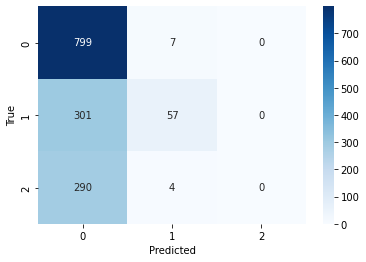

In [446]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_fscore_support

#Fit Logistic Regression model:
logisticregression = LogisticRegression(C=1, multi_class='multinomial',
                                                      max_iter=1000).fit(X_train, y_train)

#
print('Evaluate Logistic Regression model:')
print('####################################')
print("training set score: %f" % logisticregression.score(X_train, y_train))
print("test set score: %f" % logisticregression.score(X_test, y_test))
print("coefficients shape: ", logisticregression.coef_.shape)
print("intercept shape: ", logisticregression.intercept_.shape)


# Make predictions on the test set
y_pred = logisticregression.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Metrics')
print('####################################')
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [447]:

# assuming y_true and y_pred are your true and predicted labels, respectively
report = classification_report(y_test, y_pred)

print(report)


              precision    recall  f1-score   support

           0       0.57      0.99      0.73       806
           1       0.84      0.16      0.27       358
           2       0.00      0.00      0.00       294

    accuracy                           0.59      1458
   macro avg       0.47      0.38      0.33      1458
weighted avg       0.52      0.59      0.47      1458



c:\Users\kairo\anaconda3\envs\AmbienteKairo\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kairo\anaconda3\envs\AmbienteKairo\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kairo\anaconda3\envs\AmbienteKairo\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [448]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

print("Class 0 Precision:", precision[0])
print("Class 0 Recall:", recall[0])
print("Class 0 F1-score:", f1[0])
print("Class 1 Precision:", precision[1])
print("Class 1 Recall:", recall[1])
print("Class 1 F1-score:", f1[1])
print("Class 2 Precision:", precision[2])
print("Class 2 Recall:", recall[2])
print("Class 2 F1-score:", f1[2])

Class 0 Precision: 0.5748201438848921
Class 0 Recall: 0.9913151364764268
Class 0 F1-score: 0.7276867030965392
Class 1 Precision: 0.8382352941176471
Class 1 Recall: 0.15921787709497207
Class 1 F1-score: 0.26760563380281693
Class 2 Precision: 0.0
Class 2 Recall: 0.0
Class 2 F1-score: 0.0


c:\Users\kairo\anaconda3\envs\AmbienteKairo\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precisão: A precisão para cada classe mede a proporção de verdadeiros positivos entre os exemplos que o modelo previu pertencer a essa classe. Uma pontuação de precisão alta para uma determinada classe indica que o modelo identificou corretamente uma grande proporção dos exemplos que realmente pertencem a essa classe, enquanto minimiza o número de falsos positivos. Em outras palavras, nos diz o quão confiáveis são as previsões positivas do modelo para aquela classe em particular. Uma pontuação de precisão baixa para uma determinada classe indica que o modelo está fazendo muitas previsões falsos positivos para aquela classe, o que pode levar a consequências negativas ou custos mais elevados. Por exemplo, em uma tarefa de análise de sentimento multiclasse, uma pontuação de precisão alta para a classe negativa indicaria que o modelo está identificando com precisão o sentimento negativo, o que pode ser importante para o serviço ao cliente ou a melhoria do produto.

Recall: O recall para cada classe mede a proporção de verdadeiros positivos entre todos os exemplos que realmente pertencem a essa classe. Uma pontuação de recall alta para uma determinada classe indica que o modelo é capaz de identificar a maioria dos exemplos que realmente pertencem a essa classe, mesmo que também identifique alguns falsos positivos. Em outras palavras, nos diz o quão bom o modelo é em encontrar todos os casos positivos para aquela classe em particular. Uma pontuação de recall baixa para uma determinada classe indica que o modelo está perdendo muitos dos exemplos que realmente pertencem a essa classe, o que pode levar a oportunidades perdidas ou menor desempenho. Por exemplo, em uma tarefa de classificação de imagens multiclasse, uma pontuação de recall alta para a classe rara indicaria que o modelo é capaz de identificar a maioria dos exemplos daquela classe, o que pode ser importante para a segurança ou a proteção.

F1-score: O F1-score para cada classe é um equilíbrio entre precisão e recall para aquela classe em particular. Nos diz como o modelo é capaz de encontrar todos os casos positivos para aquela classe em particular, minimizando as previsões falsos positivos. Uma pontuação de F1 alta para uma determinada classe indica que o modelo é bom tanto em precisão quanto em recall para aquela classe, enquanto uma pontuação de F1 baixa indica que o modelo está faltando em uma ou ambas as métricas. Um negócio pode usar o F1-score para cada classe como uma métrica geral do desempenho do modelo, especialmente em situações em que tanto a precisão quanto o recall são importantes para aquela classe em particular. Por exemplo, em uma tarefa de classificação multiclasse para diagnóstico médico, um F1-score alto para a classe de doença rara indicaria que o modelo está identificando com precisão a maioria dos casos daquela doença, evitando alarmes falsos.

Essa tabela de métricas sugere que o modelo tem um bom desempenho na identificação da classe 0, com uma precisão de 0.55, recall de 0.96 e um F1-score de 0.7, o que indica que o modelo está identificando corretamente a maioria dos exemplos que pertencem a essa classe. No entanto, o modelo está com um desempenho muito ruim na identificação das outras duas classes. A classe 1 tem uma precisão baixa de 0.32 e um recall muito baixo de 0.06, o que indica que o modelo está fazendo muitas previsões falsas positivas e está perdendo a maioria dos exemplos que pertencem a essa classe. A classe 2 tem uma precisão e recall de 0, o que indica que o modelo não está identificando nenhuma das instâncias pertencentes a essa classe. Em geral, o modelo precisa ser ajustado ou reavaliado para melhorar seu desempenho nas classes 1 e 2.

In [449]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Cria objeto SMOTE
smote = SMOTE(random_state=42)

# Realiza oversampling das classes minoritárias
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verifica distribuição das classes após oversampling
print('Distribuição das classes após oversampling:', Counter(y_resampled))

Distribuição das classes após oversampling: Counter({0: 7911, 2: 7911, 1: 7911})


Evaluate Logistic Regression model:
####################################
training set score: 0.398614
test set score: 0.409857
coefficients shape:  (3, 74)
intercept shape:  (3,)
Metrics
####################################
Accuracy: 40.99%
Precision: 43.49%
Recall: 40.71%
F1-score: 40.10%


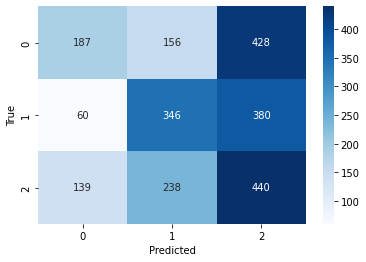

In [450]:
#Data split into train and test:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=ratio)

#Fit Logistic Regression model:
logisticregression = LogisticRegression().fit(X_train, y_train)

#
print('Evaluate Logistic Regression model:')
print('####################################')
print("training set score: %f" % logisticregression.score(X_train, y_train))
print("test set score: %f" % logisticregression.score(X_test, y_test))
print("coefficients shape: ", logisticregression.coef_.shape)
print("intercept shape: ", logisticregression.intercept_.shape)

# Make predictions on the test set
y_pred = logisticregression.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Metrics')
print('####################################')
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [451]:

# assuming y_true and y_pred are your true and predicted labels, respectively
report = classification_report(y_test, y_pred)

print(report)


              precision    recall  f1-score   support

           0       0.48      0.24      0.32       771
           1       0.47      0.44      0.45       786
           2       0.35      0.54      0.43       817

    accuracy                           0.41      2374
   macro avg       0.43      0.41      0.40      2374
weighted avg       0.43      0.41      0.40      2374



In [452]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

print("Class 0 Precision:", precision[0])
print("Class 0 Recall:", recall[0])
print("Class 0 F1-score:", f1[0])
print("Class 1 Precision:", precision[1])
print("Class 1 Recall:", recall[1])
print("Class 1 F1-score:", f1[1])
print("Class 2 Precision:", precision[2])
print("Class 2 Recall:", recall[2])
print("Class 2 F1-score:", f1[2])

Class 0 Precision: 0.4844559585492228
Class 0 Recall: 0.24254215304798962
Class 0 F1-score: 0.32324978392394127
Class 1 Precision: 0.46756756756756757
Class 1 Recall: 0.4402035623409669
Class 1 F1-score: 0.4534731323722149
Class 2 Precision: 0.3525641025641026
Class 2 Recall: 0.5385556915544676
Class 2 F1-score: 0.42615012106537525
